In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [2]:
ds = xr.open_mfdataset("../era5/era5-nordics-t2m_ymon.nc", chunks={"time": 12})

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-31T23:00:00 2018-02-28T23:00:00 ...
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<shape=(12, 73, 111), chunksize=(12, 73, 111)>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Tue Nov 20 22:18:25 2018: cdo -b 32 ymonmean -addc,-273.15 ...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

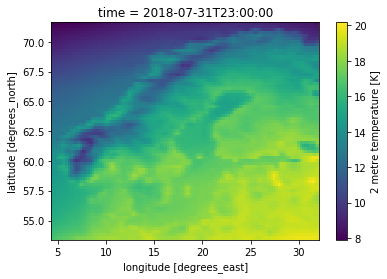

In [4]:
ds["t2m"][6].plot()

In [5]:
ds["temp_c"] = ds["t2m"] - 273.15

In [6]:
psr = xr.open_dataset("pine_spruce.nc")

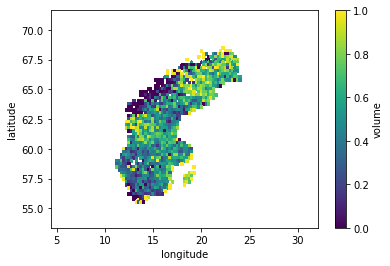

In [7]:
psr.volume.plot()

In [8]:
df = pd.DataFrame()

In [9]:
data = {
    "ratio": psr.volume.values.ravel(),
}

In [10]:
for m in range(0, 12):
    data["%d" % (m + 1)] = ds["temp_c"][m].values.ravel()

In [11]:
data.keys()

dict_keys(['ratio', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

In [12]:
df = pd.DataFrame(data)

In [13]:
df.dropna(inplace=True)

In [14]:
#df = df[df["ratio"] > 0]

In [15]:
df.columns[1:]

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [121]:
rf = RandomForestRegressor(n_estimators=500, max_depth=12)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [123]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [124]:
y_pred = rf.predict(X_test)

In [125]:
mean_squared_error(y_test, y_pred)

0.052371977514145726

In [126]:
r2_score(y_test, y_pred)

0.2983535046208218

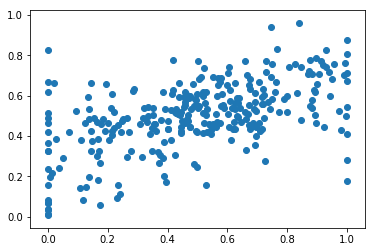

In [127]:
plt.scatter(y_test, y_pred)

In [128]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [129]:
df_results

,observed,predicted
6696,0.385761,0.292624
3264,0.136690,0.482984
4594,0.692416,0.570163
6037,0.533163,0.418535
3504,0.000000,0.666592
5579,0.717273,0.434882
6370,0.212805,0.403145
3611,0.710525,0.425700
5265,0.425134,0.521238
2945,0.749866,0.756798


In [130]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [131]:
feature_importances

,importance
5,0.132671
6,0.128878
7,0.113883
8,0.092140
1,0.090824
3,0.078843
4,0.077662
12,0.075572
2,0.061495
9,0.058374


<BarContainer object of 12 artists>

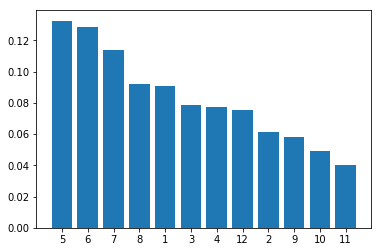

In [132]:
plt.bar(feature_importances.index, feature_importances["importance"])